# Homework 3

## ASTR 5900, Fall 2017, University of Oklahoma

### Basic Statistics II

Remember to save this document as `hw-<FirstLast>.ipynb` when you commit it to your homework repository.

# Problem 1

In X-ray and Gamma-ray astronomy, it often happens that the number of
photons recorded from an object are few.  This makes sense
energetically, as each X-ray or gamma-ray photon carries much more
energy than an optical or infrared photon.  But in many cases, each
photon is detected and counted separately.  

The Poission distribution is a discrete probability distribution that
expresses the probability of a given number of events (photons) in
some bin (e.g., time, spectral, or spatial bin), and is therefore
applicable to X-ray astronomy.  The central limit theorem indicates
that the Poisson distribution approaches the Gaussian for a large
number of photons in a bin, and in that case, Gaussian estimators
(mean and standard deviation) can be used to determine the number of
counts in the bin, and the uncertainty on the number of counts in the
bin.  The problem arises when there are few counts in a bin, i.e.,
when the rate is not high enough that the central limit theorem would
apply.

### Part A

Sample $10^4$ points from Poission distributions with counts per bin = 1, 3, 5, 9, and 15.
Plot a histogram of the resulting distributions.  Overlay the Gaussian distribution for the estimated mean and standard deviation.  Perform the plotting with `matplotlib`.

It should go without saying you will want to write a Python function that does the plotting for a single bin count.

In [2]:
import numpy as np
from matplotlib import  pyplot as plt
def plot_poisson(N):
    p=np.random.poisson(N,10000)
    counts,bins,ignored=plt.hist(p,20,normed=True)
    d=np.random.normal(p.mean(),p.std(),10000)
    counts1,bins1,ignored1=plt.hist(d,20,normed=True,alpha=0.7)

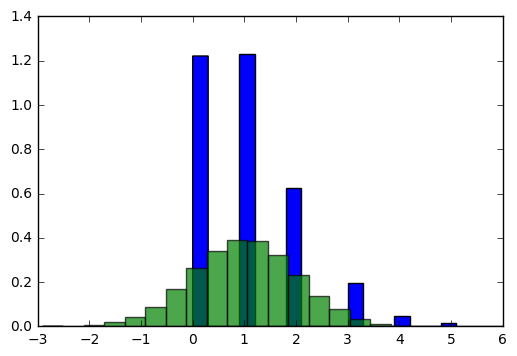

In [3]:
plot_poisson(1)
plt.show()

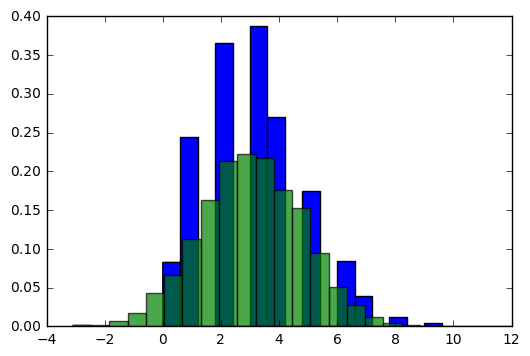

In [4]:
plot_poisson(3)
plt.show()

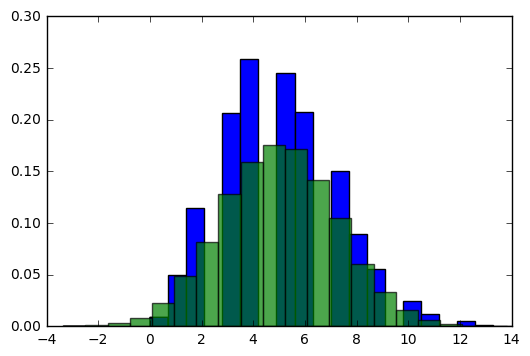

In [5]:
plot_poisson(5)
plt.show()

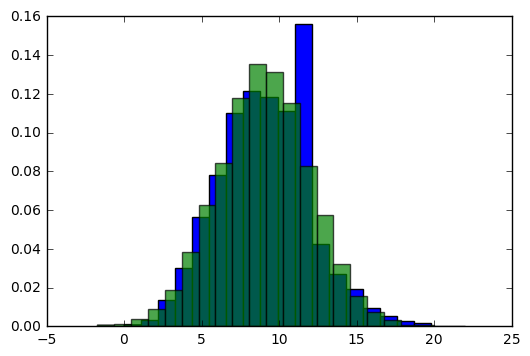

In [6]:
plot_poisson(9)
plt.show()


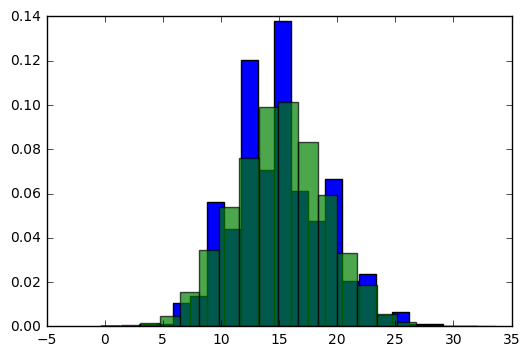

In [7]:
plot_poisson(15)
plt.show()

## Reflection

Please comment on the reliability of the Gaussian approximation for the poission distriubtion in the markdown cell below.  Specifically, are some portions of the Gaussian approximation unphysical?

A Gaussian approximation becomes a better approximation for the Poisson distribution as the number of counts per bin increases. The Gaussian approximation seems to be unphysical for low count per bin values. Also, for low count per bin values the Poisson distribution often outputs values of 0 which is not modelled by the Gaussian distribution.

### Part B

Based on your analysis above, what is the average rate of photons in a bin that you need to obtain in order that the Gaussian distribution be an acceptable approximation of the Poisson distribution.  Answers that include a quantitative discussion will receive more points.

Hint 1: one way to compare a number histogram with the Gaussian distribution is with the RMS error, i.e., 
$$E_{RMS}=\sqrt{E(\mathbf{w})/N}$$

where 

$$E(\mathbf) = \frac{1}{2} \sum_{n=1}^N \{y(x_n,\mathbf{w})-t_n\}^2$$

where $y(x_n,\mathbf{w})$ is the predictions (model), and $t_n$ is the data.

Hint 2: Another way to compare a number histogram with a Gaussian distribution is with $\chi^2$.

In [8]:
const=1./(np.sqrt(2.*np.pi))
def Gauss(x,sigma,mu):
    return const*(1./(np.sqrt(sigma)))*np.exp(-((x-mu)**2.)/(2*sigma))
    

In [9]:
def E(N):
    p=np.random.poisson(N,10000)
    counts,bins,ignored=plt.hist(p,35,normed=True)
    sigma=p.std()
    mu=p.mean()
    counts1=Gauss(bins[:-1],sigma,mu)
    temp=counts1-counts
    x=temp ** 2
    a=0.5 * sum(x)
    print np.sqrt(a/len(temp))
    
E(1)
E(3)
E(5)
E(9)
E(15)

0.350749994375
0.12917004831
0.0800655819677
0.0382178002212
0.0276615983716


### Discussion

For this data higher count per bin values make it so the Gaussian distribution is a better approximation for the Poisson distribution. It seems that count per bin values of around 9-15 produce good RMS error values, meaning an average rate of 9-15 photons in a bin allows the Gaussian distribution to be a good estimator for the Poisson distribution.

# Problem 2

Say you have an ensemble of similarly prepared systems composed of 2 electrons each.  The wave functions for these two particles, $\psi_1(x)$ and $ \psi_2(x)$, are interpreted as probability amplitudes such that 
$$ |\psi_i(x)|^2 = \rho_i(x)$$
where $\rho_i$ is the probablity density that electron $i$ is at position $x$.  These densities are Gaussian with $\mu_1 = 3, \sigma_1^2 = 1.5$ and $\mu_2 = 2, \sigma_2^2 = 2.$  Note however that the electrons *interact* so there is a non-zero covariance between the random variables: $\text{Cov}(X_i, X_j) = \text{Cov}(X_j,X_i) = 1$

### Part A

Calculate the probability that $-1 \leq x_1 \leq 3$ and $1 \leq x_2 \leq 4$ via a naive method: assume the random variables are independent and determine the joint probability by integrating the simple product of the densities (1d Gaussians).  **Hint**: Perform the integration(s) numerically by sampling points from the correct distribution and finding the fraction of sampled points that meet their respective criteria.

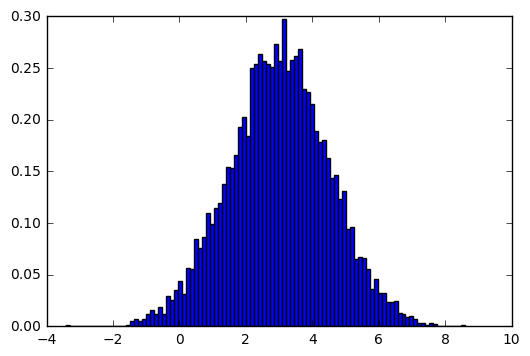

In [12]:
s=np.random.normal(loc=3,scale=1.5,size=10000)
count,bins,ignored=plt.hist(s,100,normed=True)
plt.show()

In [13]:
const=1./(np.sqrt(2.*np.pi))
sigma=1.5
mu=3.
def Gauss(x):
    return const*(1./(np.sqrt(sigma)))*np.exp(-((x-mu)**2.)/(2*sigma))

In [14]:
from scipy.integrate import quad
answer1,error=quad(Gauss,-1,3)
print answer1

0.499454582412


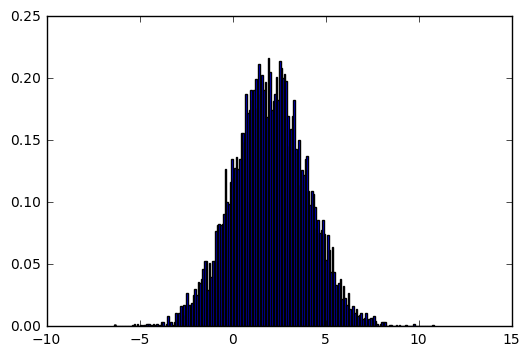

In [43]:
d=np.random.normal(loc=2,scale=2,size=10000)
count,bins,ignored=plt.hist(d,200,normed=True)
plt.show()

In [44]:
sigma=2
mu=2
answer2,error=quad(Gauss,1,4)
print answer2

0.681600335381


So, the probability of the first event is 0.499454582412 and the probability of the second event is 0.681600335381.
The probability both events will occur, assuming independent, is prob(event1) * prob(event2)

In [45]:
print answer1 * answer2

0.34042841088


prob(-1<=x1<=3 and 1<=x2<=4) = 0.34042841088 assuming the two events are independent

### Part B

Calculate the probability that $-1 \leq x_1 \leq 3$ and $1 \leq x_2 \leq 4$ with a bivariate Gaussian distribution.  **Hint**:  Use `numpy` or `scipy` routines to sample from a bivariate normal distribution.  You will have to perform a double integral rather than 2 single integrals as before.  Again, this is to be performed numerically.

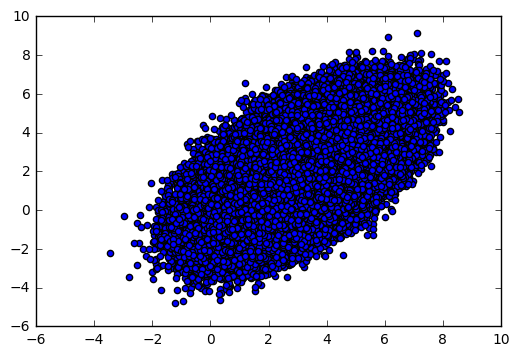

In [64]:
mean=[3,2]
cov=[[1.5,1],[1,2]]
x1,x2=np.random.multivariate_normal(mean,cov,1000000).T
plt.scatter(x1,x2)
plt.show()

In [65]:
a=zip(x1,x2)
xin=0
xtot=0
for i,j in zip(x1,x2):
    xtot+=1
    temp=np.where(i>=-1 and i<=3 and j>=1 and j<=4)
    for i in temp[0]:
        if i==0:
            xin +=1
            
print xin
print xtot
    

298883
1000000


prob(-1<=x1<=3 and 1<=x2<=4) is roughly 0.299 assuming the two events are dependent

### Part C

You should have received different results from the previous 2 parts.  However, both methods are identical if the 'coordinate system' is rotated in a certain way.

Rotate your previous sampled points such that your new covariance matrix is diagonal i.e. your variables can be treated as independent.  Consider the possibility of $-2 \leq u_1 \leq 0$ and $-4 \leq u_2 \leq 4$ where $u_i$ is the position of particle $i$ in the NEW coordinates.  Plot the boundary of this region over your distribution.  You may consider doing this plotting for the previous parts.

Calculate the probability that the position of the particle is found in this new region first through the method of Part A, then through the method of Part B.  Succinctly discuss your results.  **Hint**: Find new coordinates by rotating around the mode of the bivariate Gaussian.

In [86]:
eigvals,eigvectors=np.linalg.eig(np.array([[1.5,1],[1,2]]))
print eigvals
print eigvectors

[ 0.71922359  2.78077641]
[[-0.78820544 -0.61541221]
 [ 0.61541221 -0.78820544]]


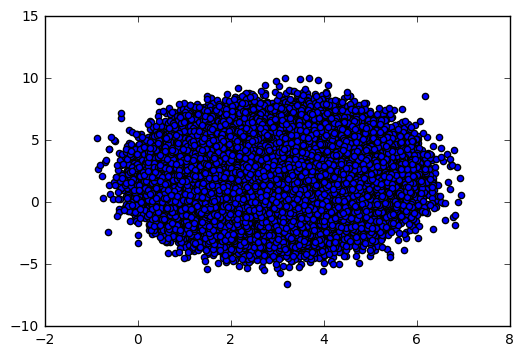

In [24]:
mean=[3,2]
cov=[[0.71922359,0],[0,2.78077641]]
x1,x2=np.random.multivariate_normal(mean,cov,1000000).T
plt.scatter(x1,x2)
plt.show()

#### Method 1

In [25]:
from scipy.integrate import quad
mu=3
sigma=0.71922359
answer1,error=quad(Gauss,-2,0)
print answer1

0.000202009808533


In [26]:
from scipy.integrate import quad
mu=2
sigma=2.78077641
answer2,error=quad(Gauss,-4,4)
print answer2

0.884644306737


In [27]:
print answer1 * answer2

0.000178706827024


#### Method 2

In [33]:
a=zip(x1,x2)
xin=0.
xtot=0.
for i,j in zip(x1,x2):
    xtot+=1.
    temp=np.where(i>=-2. and i<=0. and j>=-4. and j<=4.)
    for i in temp[0]:
        if i==0:
            xin +=1.
            
print xin
print xtot

162.0
1000000.0


xin/xtot = 0.000162

#### Discussion

After rotating the covariance matrix so the two events are independent, the method 1 and method 2 produce the same probability of being inside the given region, given random error.

## How long this is assignment take you?

About 14-16 hours